In [2]:
import matplotlib;
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

# Part 1

#### 1. Create an array with 100 elements from 1 to 100 in order: Create a box plot to visualize your data.

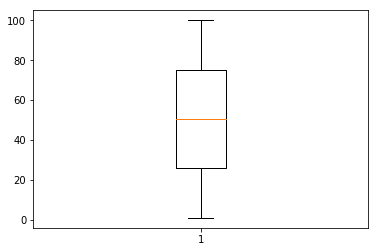

In [3]:
# fake up some data

nums = np.arange(1,101)
plt.boxplot(nums)

plt.show()


#### 2. Create an array with 10,000 random numbers. Create a histogram of the data using 20 bins.

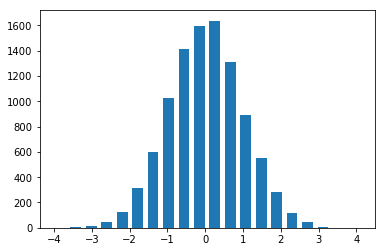

In [4]:
x =  np.random.randn(10000)
hist, bins = np.histogram(x, bins=20)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

plt.bar(center, hist, width=width)
plt.show()

#### 3. Write a program to generate 100 random number uniformly distributed between 1 and 100. Write the numbers out to a binary file and use a line graph to draw the 100 numbers.

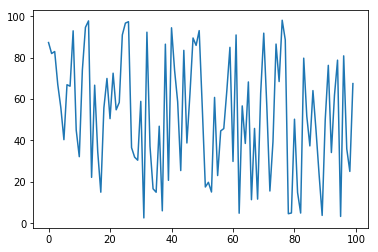

In [5]:
array = np.random.uniform(low=1,high=100,size=100)
array.tofile('uniformDistNums.bin')

plt.plot(array)
plt.show()

#### 4 Write a program to read the binary file back, divide the range between 1 and 100 into 7 intervals, and calculate the frequency for each interval: display a histogram of your result.

In [6]:
def histo(x, bins = 'auto'):
    hist, bins = np.histogram(x, bins=bins)
    width = 0.9*(bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    plt.bar(center, hist, width=width)
    plt.show()

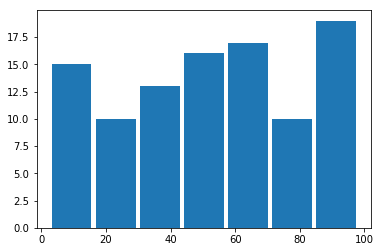

In [7]:
readarray = np.fromfile('uniformDistNums.bin')

histo(readarray, 7)
# hist, bins = np.histogram(x, bins=7)
# width = 0.9*(bins[1] - bins[0])
# center = (bins[:-1] + bins[1:]) / 2

# plt.bar(center, hist, width=width)
# plt.show()

# Part 2

## Problem 1
#### Download the NOAA Land Ocean Temperature Anomalies Data Set: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/1/6/1880-2017.csv. Create a histogram of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Describe trends in the data.

In [8]:
import pandas as pd


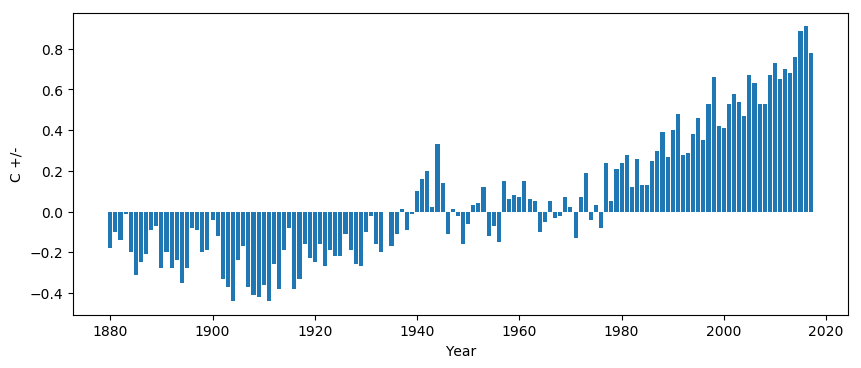

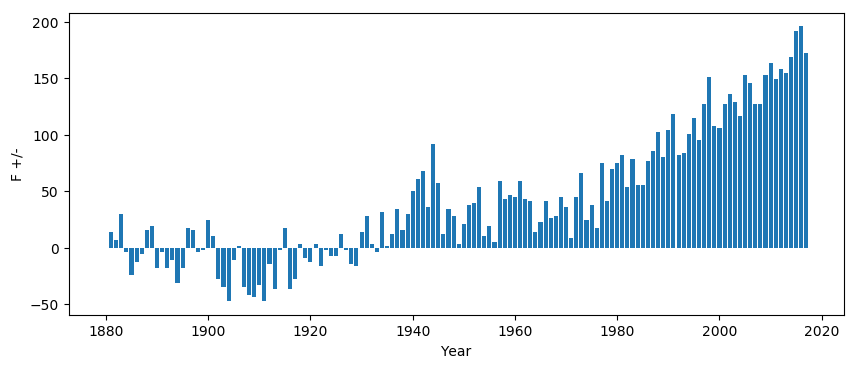

In [82]:
data = pd.read_csv('data/noaa-data.csv')

# data['Value'].hist()#
fig = plt.figure(figsize=(10, 4), dpi=100)
data['Value'] = pd.to_numeric(data['Value'])
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('C +/-')

plt.show()
fig = plt.figure(figsize=(10, 4), dpi=100)

data['Value'] = (data['Value']*100)
data['Value'] = ((data['Value'] * 1.8) + 32);
          
plt.bar(data['Year'], data['Value'])

plt.xlabel('Year')
plt.ylabel('F +/-')

plt.show()

## TODO: Describe trend

## Problem 2

#### Download the member of Congress by Age data set: https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congressterms.csv. Create a Star Plot of the data and create a Parallel Coordinates Plot of the data. Describe the trends in the data.

Code for star plot obtained from:
[https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot](https://stackoverflow.com/questions/42227409/tutorial-for-python-radar-chart-plot)

In [10]:
from math import pi

def drawStarPlot(category, values):
    # Set data
    cat = category
    values = values

    N = len(cat)

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values += values[:1]
    x_as += x_as[:1]


    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)

    # Set axes limits
    plt.ylim(0, 100)

    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, 100 + distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")


    # Show polar plot
    plt.show()

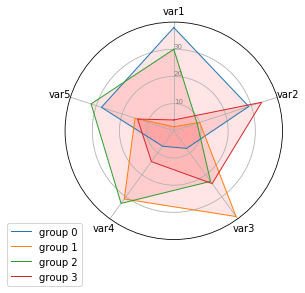

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# ------- PART 2: Add plots

# Plot each individual = each line of the data
# I d on't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
# values=df.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
# ax.fill(angles, values, 'b', alpha=0.1)
 
# # Ind2
# values=df.loc[1].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
# ax.fill(angles, values, 'r', alpha=0.1)

# # Ind3
# values=df.loc[2].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
# ax.fill(angles, values, 'r', alpha=0.1)

# # Ind 4
# values=df.loc[3].drop('group').values.flatten().tolist()
# values += values[:1]
# ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
# ax.fill(angles, values, 'r', alpha=0.1)

for i in range(0, 4):
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="group {0}".format(i))
    ax.fill(angles, values, 'r', alpha=0.1)


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

In [12]:
data = pd.read_csv('data/congress-terms.csv')

cat = ['Speed', 'Reliability', 'aloha']
values = [90, 60, 65]

data['chamber'].drop_duplicates()
# drawStarPlot(cat, values)
#grouped = data.groupby('chamber')
# for name, group in grouped:
#     #print(name)
#     print(group)
 


0       house
453    senate
Name: chamber, dtype: object

## Problem 3
Download the U.S. Birth data set:
https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-
2014_SSA.csv. What day of the month had the highest number of births? What day of
the month had the lowest number of births? Are there any interesting trends in the data,
i.e. more births in Summer or Winter? What about births on Friday the 13th?

In [13]:
data = pd.read_csv('data/US_births_2000-2014_SSA.csv')

data = data[data['day_of_week'] == 5.00]
data = data.groupby(['date_of_month', 'day_of_week'])['births'].agg('sum')
dt = data


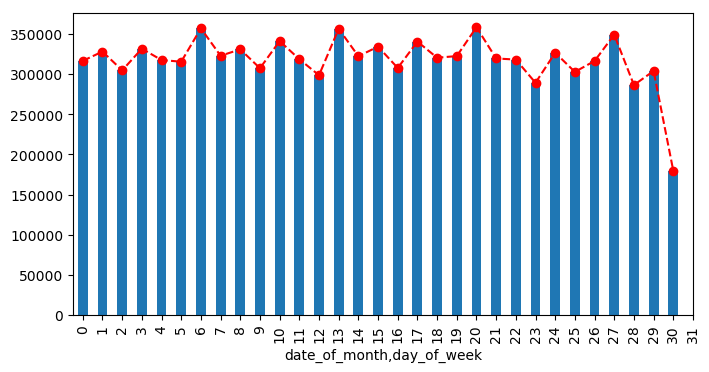

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=100)
xi = [i for i in range(0, 32)]
dt.plot(marker='o', linestyle='--', color='r', label='Square') 
dt.plot(kind='bar', legend=False)
plt.xticks(xi, xi)

plt.show()

## Problem 4 
The U.S. Government maintains a sever with many interesting datasets called Data.Gov: https://www.data.gov/. Choose 3 different data sets to visualize. Visualize the data sets in at least 3 different ways. Describe the trends in the data.

In [15]:
data = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt1))]
xi = data['Zip Code']

# dt1.plot(kind='bar', legend=False)

# dt1.plot.bar()
# fig.set_figheight(10)
# fig.set_figwidth(12)

# plt.show()
# dt.plot(kind='bar', legend=False)
plt.figure(figsize=(20, 4), dpi=100)

xi = [i for i in range(0, len(dt))]
# plt.bar(xi, dt['Total Males'])
# dt.plot()
plt.bar(xi, dt['Total Females'])

plt.xticks(xi, xi)

# dt.plot(marker='o', linestyle='--', color='r', label='Square') 
plt.show()

NameError: name 'dt1' is not defined

In [ ]:
data = pd.read_csv('data/2010_Census_Populations_by_Zip_Code.csv')

dt = data[['Total Males', 'Total Females']].head(50)
x = [i for i in range(0, len(dt1))]
xi = [i-0.5 for i in range(0, len(dt1))]

f1 = plt.figure(figsize=(20, 4), dpi=100)

ax = plt.subplot(111)
ax.bar(x, dt['Total Females'],width=0.5,align='center')
ax.bar(xi, dt['Total Males'],width=0.5,align='center')

x = [i-0.2 for i in range(0, len(dt1))]
xi = xi = data['Zip Code']
plt.xticks(x, xi,rotation='vertical')

plt.show()